In [1]:
import os
import pandas as pd 
import numpy as np
from timeit import default_timer
from matplotlib import pyplot as plt

from algorithms.local_search import LocalSearch
from algorithms.iterated import Iterated
from algorithms.guided import Guided
from tools.load_data import get_case
from tools.measures import get_time_table, get_best_table
from IPython.display import display 

# Лабораторная 3
## Quadratic Assignment Problem
Выполнили *Куклин, Кислицына, Аросланкин*.     
Здесь представлены результаты работы следующих трех эвристических алгоритмов для решения QAP:    
* Local Search
* Iterated Local Search
* Guided Local Search

### Эксперименты

Проведем эксперименты на одном из бенчмарков ('tai40a' с 40 элементами), посмотрим, какие 
примерно получаются результаты     
Построим графики спуска алгоритмов   

П.С. это не показывает лучшие найденные результаты алгоритмов, а просто демонстрирует их работу

In [3]:
root = './data/benchmarks/'
paths = ['tai20a', 'tai40a','tai60a','tai80a','tai100a']

Все три алгоритма могуть быть основаны на разных методах:    
* First improvement - метод, который предполагает, что мы меняем местами по очереди два завода 
и берем первое улучшение, когда значение целевой функции уменьшилось, и начинаем алгоритм занова.
* Best improvement - то же, что и в предыдущем методе, только мы идем по заводам, и выбираем для него 
лучшие изменение и начинает алгоритм занова. 
* Stochastic 2 opt - метод, в котором мы задаем k итераций, алгоритм k раз выбирает случайный отрезок 
из заводов и меняет их местами в обратном порядке, записывает лучший результат.    

Кроме того, для первых двух методов (First/Best improvement) мы используем улучшение в виде техники
**don't look bits**, которая предполагает запоминание заведомо невыгодных перестановок. 

П.С. описания на пальцах для понимания того, что мы ипользуем.

In [12]:
data = get_case(os.path.join(root, paths[1]))

### Local Search

#### First improvement

File: tai40a
Found cost: 3273180
Answer:
[ 9 34 15 31 22 37 35 19 20  3 38 30 27 17  2 12 13 29 23  8  5  4 33 10
 21 18  1 39 11  7 16  0 25 32 28 26 36 14  6 24]


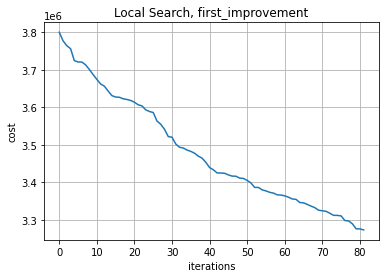

In [6]:
exp = LocalSearch(*data.values())
answer = exp.run('first_improvement', dlb=True)  # dlb means dont_look_bits
print(f'File: {paths[1]}\nFound cost: {exp.cost_fun.tolist()}\nAnswer:\n{answer}')
exp.plot('Local Search, first_improvement')

#### Best improvement

File: tai40a
Found cost: 3256188
Answer:
[27 32 34 15 30 26  9 16 12 28 38 21 24  8 37 18 17  6 11 39 20  5  0 14
 36 29  1 22 13 31 10  3 19 25 23  2 35  4 33  7]


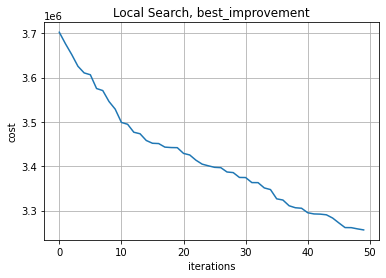

In [6]:
exp = LocalSearch(*data.values())
answer = exp.run('best_improvement', dlb=True)
print(f'File: {paths[1]}\nFound cost: {exp.cost_fun.tolist()}\nAnswer:\n{answer}')
exp.plot('Local Search, best_improvement')

#### Stochastic 2 opt

File: tai40a
Found cost: 3682034
Answer:
[33  7  5 25  2 38 15 31 16 12 32 28 36 22 17  8  9 27 23 35 37 30 18  6
 19  0 26 14 24 10 20 29  3  1 21 13 11  4 34 39]


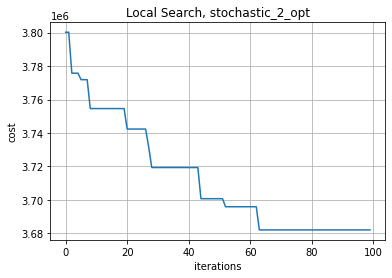

In [52]:
exp = LocalSearch(*data.values())
answer = exp.run('stochastic_2_opt')
print(f'File: {paths[1]}\nFound cost: {exp.cost_fun.tolist()}\nAnswer:\n{answer}')
exp.plot('Local Search, stochastic_2_opt')


#### Iterated with first improvement

File: tai40a
Found cost: 3235668
Answer:
[ 5 20 30 35 15  0 13 16 39 18 24 23 38  2  7  4 36 32  3 19 12 29 22 33
 21 11 31 28 14  6  9 27 25 10 17  8 26 34  1 37]


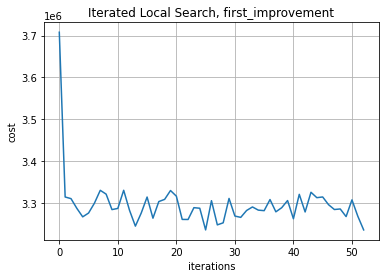

In [7]:
data = get_case(os.path.join(root, paths[1]))
exp = Iterated(*data.values())
answer = exp.run('first_improvement', dlb=True, epoches=50) 
print(f'File: {paths[1]}\nFound cost: {exp.cost_fun.tolist()}\nAnswer:\n{answer}')
exp.plot('Iterated Local Search, first_improvement')


#### Guided with best improvement

reafhgdf
File: tai40a
Found cost: 3249396
Answer:
[19  6 33 31  2 27  9  1  0  4 39  3 20 34  7 21 38 13 36 24 10 28 37 18
  5 22 17 11 35 25 29 30 15 16 26 23 32  8 14 12]
CPU times: user 9.92 s, sys: 39.2 ms, total: 9.96 s
Wall time: 10 s


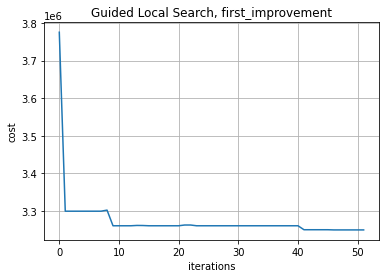

In [9]:
%%time
data = get_case(os.path.join(root, paths[1]))
exp = Guided(*data.values())
answer = exp.run('best_improvement', dlb=True, epoches=50, mu=1) 
print(f'File: {paths[1]}\nFound cost: {exp.cost_fun.tolist()}\nAnswer:\n{answer}')
exp.plot('Guided Local Search, first_improvement')

### Сравнение времени работы алгоритмов  

Выгрузим данные экспериментов в файлы для сохранности. 

In [3]:
get_time_table(os.path.join(root, paths[0]), iterations=10, epoches=20)
get_time_table(os.path.join(root, paths[1]), iterations=10, epoches=20)
get_time_table(os.path.join(root, paths[2]), iterations=10, epoches=20)
get_time_table(os.path.join(root, paths[3]), iterations=10, epoches=20)
get_time_table(os.path.join(root, paths[4]), iterations=10, epoches=20)


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


In [ ]:
get_best_table(os.path.join(root, paths[0]), iterations=10, epoches=20)
get_best_table(os.path.join(root, paths[1]), iterations=10, epoches=20)
get_best_table(os.path.join(root, paths[2]), iterations=10, epoches=20)
get_best_table(os.path.join(root, paths[3]), iterations=10, epoches=20)
get_best_table(os.path.join(root, paths[4]), iterations=10, epoches=20)

Для усреднения мы брали кол-во итераций = 10 и следующие параметры алгоритмов:    
* для stochastic 2 opt берем 100 итераций
* для Iterated берем 20 эпох (сколько раз он будет перепрогонять Local Search)
* для Iterated берем swap_num = n//5 (сколько пар заводов поменяется в perturbation)
* для Guided берем 20 эпох (сколько раз он будет перепрогонять Local Search)
* для Guided берем mu = 1 (по нашим экспериментам она показывала себя неплохо)

#### Случай **tai20a** с 20 элементами  

In [4]:
df_time_20 = pd.read_csv('./data/output/tai20a_time.csv')
df_time_20.drop(df_time_20.columns[0:1], axis=1, inplace=True)
df_time_20.iloc[:,1:]

,algorithm,method,mean_time,mean_result
0,LocalSearch,first_improvement,0.107102,748778
1,LocalSearch,best_improvement,0.110716,744543
2,LocalSearch,stochastic_2_opt,0.046531,839701
3,Iterated,first_improvement,1.562292,722426
4,Iterated,best_improvement,1.774044,723525
5,Iterated,stochastic_2_opt,0.954749,817442
6,Guided,first_improvement,0.511579,734898
7,Guided,best_improvement,0.558344,733539
8,Guided,stochastic_2_opt,1.066756,851897


#### Случай **tai40a** с 40 элементами  

In [5]:
df_time_40 = pd.read_csv('./data/output/tai40a_time.csv')
df_time_40.drop(df_time_40.columns[0:1], axis=1, inplace=True)
df_time_40.iloc[:,1:]

,algorithm,method,mean_time,mean_result
0,LocalSearch,first_improvement,1.468410,3295775
1,LocalSearch,best_improvement,1.335143,3290988
2,LocalSearch,stochastic_2_opt,0.173005,3655709
3,Iterated,first_improvement,23.507567,3245695
4,Iterated,best_improvement,21.348240,3247951
5,Iterated,stochastic_2_opt,3.515627,3629795
6,Guided,first_improvement,4.163474,3276016
7,Guided,best_improvement,4.490636,3270311
8,Guided,stochastic_2_opt,3.365441,3677839


#### Случай **tai60a** с 60 элементами  

In [6]:
df_time_60 = pd.read_csv('./data/output/tai60a_time.csv')
df_time_60.drop(df_time_60.columns[0:1], axis=1, inplace=True)
df_time_60.iloc[:,1:]

,algorithm,method,mean_time,mean_result
0,LocalSearch,first_improvement,6.132006,7549673
1,LocalSearch,best_improvement,6.107637,7514844
2,LocalSearch,stochastic_2_opt,0.403107,8358331
3,Iterated,first_improvement,113.088613,7461562
4,Iterated,best_improvement,102.712897,7431900
5,Iterated,stochastic_2_opt,7.920209,8285153
6,Guided,first_improvement,16.827666,7489534
7,Guided,best_improvement,19.052117,7460978
8,Guided,stochastic_2_opt,7.608713,8355556


#### Случай **tai80a** с 80 элементами  

In [7]:
df_time_80 = pd.read_csv('./data/output/tai80a_time.csv')
df_time_80.drop(df_time_80.columns[0:1], axis=1, inplace=True)
df_time_80.iloc[:,1:]

,algorithm,method,mean_time,mean_result
0,LocalSearch,first_improvement,17.300805,14061954
1,LocalSearch,best_improvement,20.100503,14138884
2,LocalSearch,stochastic_2_opt,0.704806,15296364
3,Iterated,first_improvement,410.421193,13912448
4,Iterated,best_improvement,332.302857,13953530
5,Iterated,stochastic_2_opt,14.907913,15259372
6,Guided,first_improvement,48.401468,14026128
7,Guided,best_improvement,41.766607,13999996
8,Guided,stochastic_2_opt,14.350834,15400008


#### Случай **tai100a** с 100 элементами  

In [8]:
df_time_100 = pd.read_csv('./data/output/tai100a_time.csv')
df_time_100.drop(df_time_100.columns[0:1], axis=1, inplace=True)
df_time_100.iloc[:,1:]

,algorithm,method,mean_time,mean_result
0,LocalSearch,first_improvement,54.066237,21807530
1,LocalSearch,best_improvement,93.937063,21692212
2,LocalSearch,stochastic_2_opt,1.222562,23750662
3,Iterated,first_improvement,1122.612295,21635998
4,Iterated,best_improvement,894.353769,21601194
5,Iterated,stochastic_2_opt,26.869553,23609002
6,Guided,first_improvement,118.339506,21741720
7,Guided,best_improvement,108.285422,21824710
8,Guided,stochastic_2_opt,25.653447,23863570


По всем бенчмаркам можно сделать следующие выводы:    
Как и предполагалось, Iterated и Guided зависят от скорости работы Local Search с соответствующими методами (практически линейно, все зависит от начальной инициализации решения для каждого метода). Stochastic 2 opt работает 
намного быстрее First/Best improvement, что логично, так как у него всегда фиксированное кол-во итераций, а не $n^2$, как у предыдущих методов.      
Guided работает быстрее, чем Iterated, но не всегда выдает ответы лучше. Опять же все зависит от начального решения. Но точно можно сказать, что Guided и Iterated выдают среднее решение лучше, чем просто Local Search, на что они в принципе и нацелены.

**Лучшие результаты, которые мы смогли получить, играя с параметрами, записаны в файлы папке 
./data/output/to_send/**  
Результаты целевых функций для лучших найденных решений:       
Tai20a_Guided.sol 721516    
Tai20a_Iterated.sol 706786    
Tai20a_LocalSearch.sol 722748    
Tai40a_Guided.sol 3223396     
Tai40a_Iterated.sol 3200120    
Tai40a_LocalSearch.sol 3252696  
Tai60a_Guided.sol 7482464  
Tai60a_Iterated.sol 7446712  
Tai60a_LocalSearch.sol 7530554  
Tai80a_Guided.sol 13997046  
Tai80a_Iterated.sol 13924414  
Tai80a_LocalSearch.sol 14027474  
Tai100a_Guided.sol 21902876  
Tai100a_Iterated.sol 21669774  
Tai100a_LocalSearch.sol 21784684  

### Сравнение работы каждого отдельного алгоритма при увеличении кол-ва элементов

#### Local Search with first improvement

In [15]:
pd.concat([df_time_20[(df_time_20.algorithm=='LocalSearch') & (df_time_20.method=='first_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='LocalSearch') & (df_time_40.method=='first_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='LocalSearch') & (df_time_60.method=='first_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='LocalSearch') & (df_time_80.method=='first_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='LocalSearch') & (df_time_100.method=='first_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,LocalSearch,first_improvement,0.107102
1,tai40a,LocalSearch,first_improvement,1.468410
2,tai60a,LocalSearch,first_improvement,6.132006
3,tai80a,LocalSearch,first_improvement,17.300805
4,tai100a,LocalSearch,first_improvement,54.066237


#### Local Search with best improvement

In [16]:
pd.concat([df_time_20[(df_time_20.algorithm=='LocalSearch') & (df_time_20.method=='best_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='LocalSearch') & (df_time_40.method=='best_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='LocalSearch') & (df_time_60.method=='best_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='LocalSearch') & (df_time_80.method=='best_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='LocalSearch') & (df_time_100.method=='best_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,LocalSearch,best_improvement,0.110716
1,tai40a,LocalSearch,best_improvement,1.335143
2,tai60a,LocalSearch,best_improvement,6.107637
3,tai80a,LocalSearch,best_improvement,20.100503
4,tai100a,LocalSearch,best_improvement,93.937063


#### Local Search with stochastic 2 opt

In [17]:
pd.concat([df_time_20[(df_time_20.algorithm=='LocalSearch') & (df_time_20.method=='stochastic_2_opt')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='LocalSearch') & (df_time_40.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='LocalSearch') & (df_time_60.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='LocalSearch') & (df_time_80.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='LocalSearch') & (df_time_100.method=='stochastic_2_opt')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,LocalSearch,stochastic_2_opt,0.046531
1,tai40a,LocalSearch,stochastic_2_opt,0.173005
2,tai60a,LocalSearch,stochastic_2_opt,0.403107
3,tai80a,LocalSearch,stochastic_2_opt,0.704806
4,tai100a,LocalSearch,stochastic_2_opt,1.222562


#### Iterated Local Search with first improvement

In [18]:
pd.concat([df_time_20[(df_time_20.algorithm=='Iterated') & (df_time_20.method=='first_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Iterated') & (df_time_40.method=='first_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Iterated') & (df_time_60.method=='first_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Iterated') & (df_time_80.method=='first_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Iterated') & (df_time_100.method=='first_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Iterated,first_improvement,1.562292
1,tai40a,Iterated,first_improvement,23.507567
2,tai60a,Iterated,first_improvement,113.088613
3,tai80a,Iterated,first_improvement,410.421193
4,tai100a,Iterated,first_improvement,1122.612295


#### Iterated Local Search with best improvement

In [19]:
pd.concat([df_time_20[(df_time_20.algorithm=='Iterated') & (df_time_20.method=='best_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Iterated') & (df_time_40.method=='best_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Iterated') & (df_time_60.method=='best_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Iterated') & (df_time_80.method=='best_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Iterated') & (df_time_100.method=='best_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Iterated,best_improvement,1.774044
1,tai40a,Iterated,best_improvement,21.348240
2,tai60a,Iterated,best_improvement,102.712897
3,tai80a,Iterated,best_improvement,332.302857
4,tai100a,Iterated,best_improvement,894.353769


#### Iterated Local Search with stochastic 2 opt

In [20]:
pd.concat([df_time_20[(df_time_20.algorithm=='Iterated') & (df_time_20.method=='stochastic_2_opt')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Iterated') & (df_time_40.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Iterated') & (df_time_60.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Iterated') & (df_time_80.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Iterated') & (df_time_100.method=='stochastic_2_opt')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Iterated,stochastic_2_opt,0.954749
1,tai40a,Iterated,stochastic_2_opt,3.515627
2,tai60a,Iterated,stochastic_2_opt,7.920209
3,tai80a,Iterated,stochastic_2_opt,14.907913
4,tai100a,Iterated,stochastic_2_opt,26.869553


#### Guided Local Search with first improvement


In [21]:
pd.concat([df_time_20[(df_time_20.algorithm=='Guided') & (df_time_20.method=='first_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Guided') & (df_time_40.method=='first_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Guided') & (df_time_60.method=='first_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Guided') & (df_time_80.method=='first_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Guided') & (df_time_100.method=='first_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Guided,first_improvement,0.511579
1,tai40a,Guided,first_improvement,4.163474
2,tai60a,Guided,first_improvement,16.827666
3,tai80a,Guided,first_improvement,48.401468
4,tai100a,Guided,first_improvement,118.339506


#### Guided Local Search with best improvement

In [22]:
pd.concat([df_time_20[(df_time_20.algorithm=='Guided') & (df_time_20.method=='best_improvement')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Guided') & (df_time_40.method=='best_improvement')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Guided') & (df_time_60.method=='best_improvement')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Guided') & (df_time_80.method=='best_improvement')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Guided') & (df_time_100.method=='best_improvement')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Guided,best_improvement,0.558344
1,tai40a,Guided,best_improvement,4.490636
2,tai60a,Guided,best_improvement,19.052117
3,tai80a,Guided,best_improvement,41.766607
4,tai100a,Guided,best_improvement,108.285422


#### Guided Local Search with stochastic 2 opt

In [23]:
pd.concat([df_time_20[(df_time_20.algorithm=='Guided') & (df_time_20.method=='stochastic_2_opt')].iloc[:,:-1], 
           df_time_40[(df_time_40.algorithm=='Guided') & (df_time_40.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_60[(df_time_60.algorithm=='Guided') & (df_time_60.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_80[(df_time_80.algorithm=='Guided') & (df_time_80.method=='stochastic_2_opt')].iloc[:,:-1],
           df_time_100[(df_time_100.algorithm=='Guided') & (df_time_100.method=='stochastic_2_opt')].iloc[:,:-1]], 
          ignore_index=True)

,file,algorithm,method,mean_time
0,tai20a,Guided,stochastic_2_opt,1.066756
1,tai40a,Guided,stochastic_2_opt,3.365441
2,tai60a,Guided,stochastic_2_opt,7.608713
3,tai80a,Guided,stochastic_2_opt,14.350834
4,tai100a,Guided,stochastic_2_opt,25.653447
